In [ ]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.preprocessing import LabelEncoder
lencode = LabelEncoder()
df['Gender'] = lencode.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_features = df[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
scaled_features = ss.fit_transform(df_features.drop('CustomerID',axis=1))
df_features.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
from sklearn.cluster import KMeans
kmn = KMeans(n_clusters=5,random_state=1)
kmn.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

For cluster = 1, WCSS is 800.0000000000003
For cluster = 2, WCSS is 588.8026767824932
For cluster = 3, WCSS is 476.78755441351575
For cluster = 4, WCSS is 388.7178614053844
For cluster = 5, WCSS is 331.3098837641085
For cluster = 6, WCSS is 276.41175953130954
For cluster = 7, WCSS is 236.20494707086885
For cluster = 8, WCSS is 199.75046112065573
For cluster = 9, WCSS is 174.23547730691482


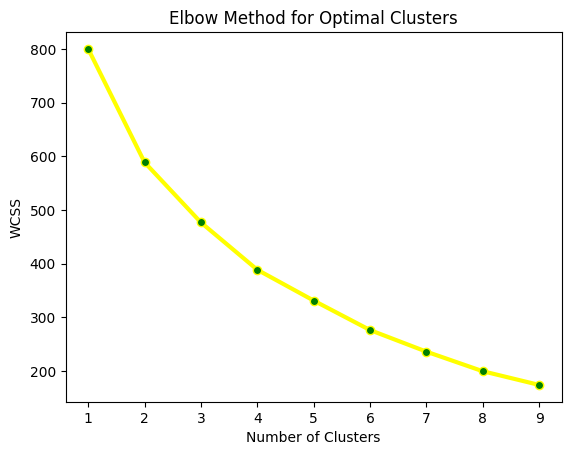

In [ ]:
sse = {}
for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    sse[k] = model.inertia_
    print("For cluster = {}, WCSS is {}".format(k, sse[k]))


plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), linewidth=3, color='yellow', marker='o', markerfacecolor='green')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

For cluster= 2, Silhouette Coefficient is 0.2518152915788437
For cluster= 3, Silhouette Coefficient is 0.25971470188178947
For cluster= 4, Silhouette Coefficient is 0.3016237438985174
For cluster= 5, Silhouette Coefficient is 0.31664426428574227
For cluster= 6, Silhouette Coefficient is 0.32546318736705987
For cluster= 7, Silhouette Coefficient is 0.35751049807968127
For cluster= 8, Silhouette Coefficient is 0.38789367668675423


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For cluster= 9, Silhouette Coefficient is 0.4020436729348452


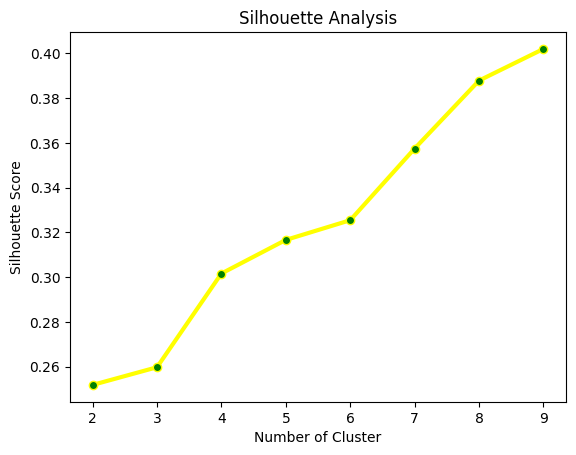

In [ ]:
from sklearn.metrics import silhouette_score
ss = {}

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    label = model.labels_
    sil_coeff = silhouette_score(scaled_features,label,metric = 'euclidean')
    ss[k] = sil_coeff
    print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))

plt.figure()
plt.plot(list(ss.keys()),list(ss.values()), linewidth=3, color = 'Yellow', marker='o', markerfacecolor='green')
plt.xlabel("Number of Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
kmnn = KMeans(n_clusters=8,random_state=1)
kmnn.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=1)

In [ ]:
centroids = kmnn.cluster_centers_
clusters = kmnn.labels_
print(centroids)
print(clusters)

[[-0.88640526  0.86614636 -0.51035622 -0.36660144]
 [ 1.12815215 -0.97602698 -0.73705168  0.41603773]
 [ 1.12815215  1.37699013 -0.49354486 -0.44055282]
 [ 1.12815215 -0.02700694  0.96701244 -1.39716754]
 [-0.88640526 -0.92220196 -0.80272555  0.36104051]
 [-0.88640526 -0.45245636  0.94327069  1.17982252]
 [-0.88640526  0.16940716  1.0433513  -0.99464925]
 [ 1.12815215 -0.39989994  1.01344075  1.26040667]]
[1 1 4 4 4 4 0 4 2 4 2 4 0 4 2 1 4 1 2 4 1 1 0 1 0 1 0 1 0 4 2 4 2 1 0 4 0
 4 0 4 0 1 2 4 0 4 0 4 4 4 0 1 4 2 0 2 0 2 4 2 2 1 0 0 2 1 0 0 1 4 2 0 0 0
 2 1 0 1 4 0 2 1 2 0 4 2 0 4 4 0 0 1 2 0 4 1 0 4 2 1 4 0 2 1 2 4 0 2 2 2 2
 4 0 1 4 4 0 0 0 0 1 6 5 7 6 5 3 7 2 7 3 7 6 5 3 5 6 7 3 5 6 7 6 5 3 7 3 5
 6 7 3 7 6 5 6 5 3 5 3 5 6 5 3 5 3 5 3 5 6 7 3 7 3 7 6 5 3 7 3 7 6 5 3 5 6
 7 6 7 6 5 6 5 3 5 6 5 6 7 3 7]


In [ ]:
df['Cluster'] = kmnn.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
cluster_clr = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "y",
    3: "g",
    4: "black",
    5: "gray",
    6: "orange",
    7: "pink",
})


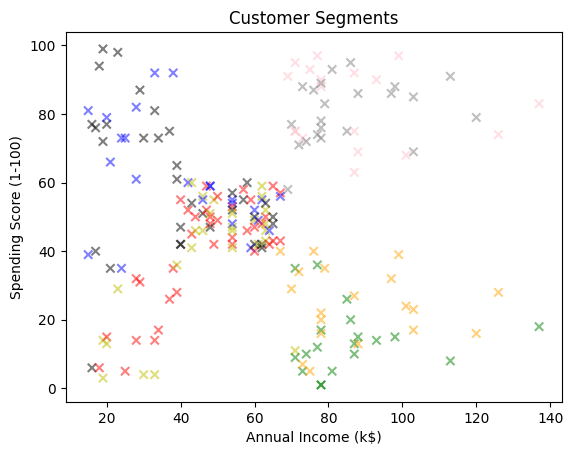

In [ ]:
import matplotlib.pyplot as plt
df['Cluster'] = clusters

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=cluster_clr, marker="x", alpha=.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

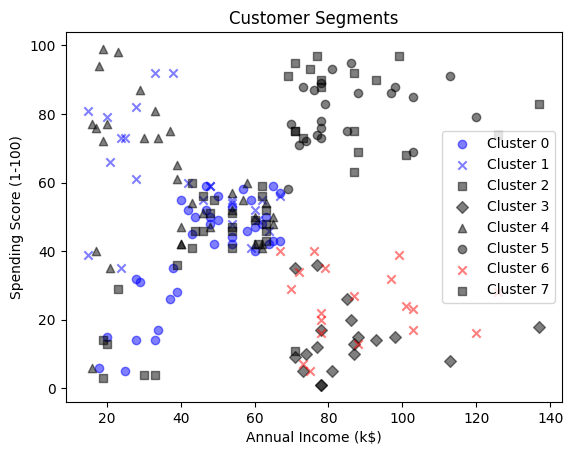

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example cluster markers
markers = ['o', 'x', 's', 'D', '^']  # Add more if you have more clusters

# Assuming clusters is a list or array of cluster labels
unique_clusters = np.unique(df['Cluster'])  # Unique cluster identifiers

# Create a scatter plot with different markers for each cluster
for i, cluster in enumerate(unique_clusters):
    # Subset the data for the current cluster
    cluster_data = df[df['Cluster'] == cluster]

    # Scatter plot for the current cluster
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                c=cluster_clr[i],
                marker=markers[i % len(markers)],  # Cycle through markers
                alpha=0.5,
                label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()  # Show a legend to differentiate clusters
plt.show()
